# Gerando gráficos - parte 1 

(Análise descritiva)

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sinasc.csv')
print(df.shape)
df.head()

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [5]:
# Por simplicidade pode-se gerar um novo DataFrame
df1 = df[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]
print(df1.shape)
df1.head()

(27028, 5)


,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0


<Axes: xlabel='APGAR1'>

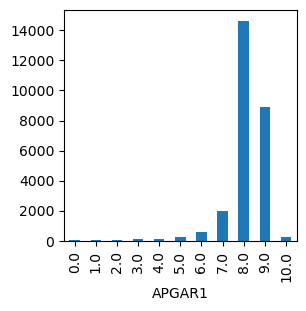

In [33]:
# Gerando a figura diretamente pelo .plot.bar()

# APGAR1
# Gerando e ajustando o tamanho da figura
fig = plt.figure(figsize=(3,3)) 
# Realizando a plotagem
df1['APGAR1'].value_counts().sort_index().plot.bar()

<Axes: xlabel='APGAR5'>

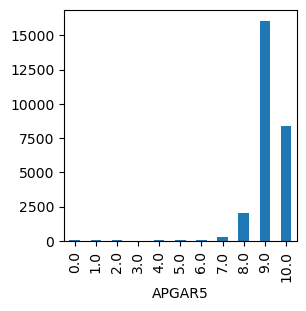

In [41]:
# APGAR5
fig = plt.figure(figsize=(3,3))
df1.APGAR5.value_counts().sort_index().plot.bar()

<Axes: xlabel='SEXO', ylabel='count'>

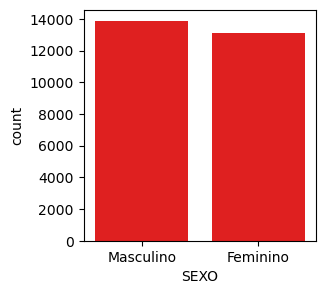

In [51]:
# Utilizando o seaborn para as demais variáveis

fig = plt.figure(figsize=(3,3))
# Plotagem utilizando o sns
sns.countplot(x = 'SEXO', data=df1, color='r')

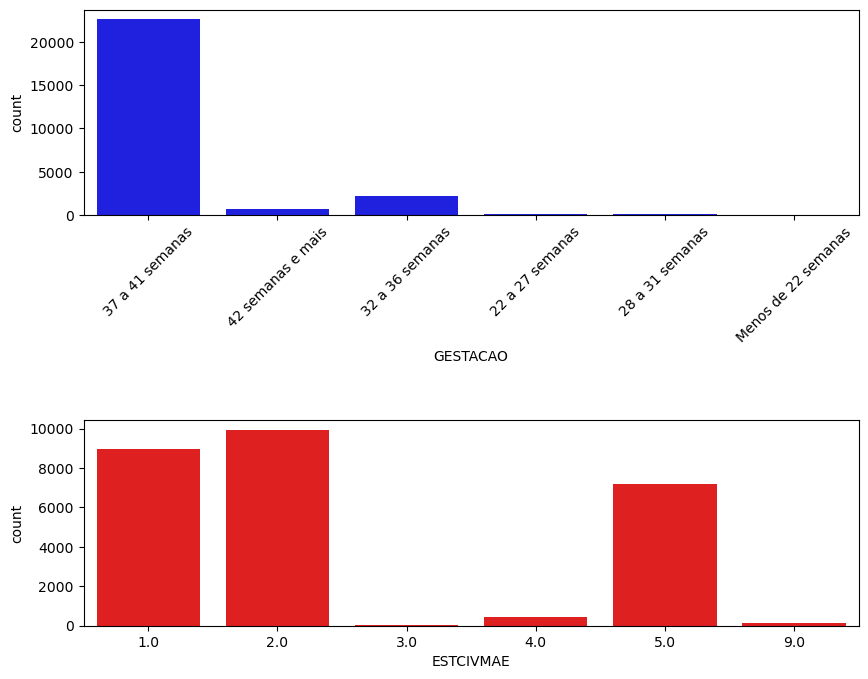

In [157]:
# Gerando uma única figura com 2 eixos para as demais variáveis

fig, axes = plt.subplots(2,1)
plt.rc('figure', figsize=(10,8))

ax1 = sns.countplot(ax = axes[0], x = 'GESTACAO', data=df1, color='b')
ax1.tick_params(axis='x' ,rotation=45)

ax2 = sns.countplot(ax = axes[1], x = 'ESTCIVMAE', data=df1, color='r')


plt.subplots_adjust(wspace=0, hspace=1)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

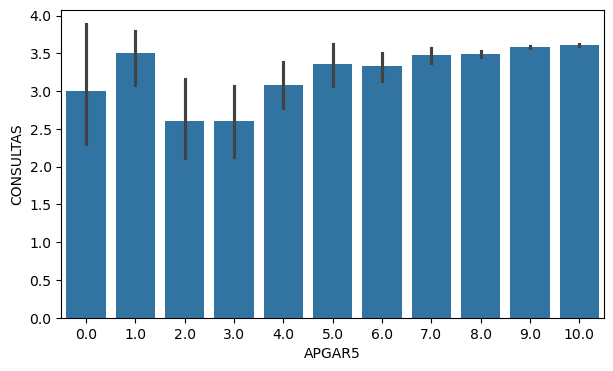

In [169]:
# Gerando e configurando o tamanho da figura
fig = plt.figure(figsize=(7,4))
# Plotando o gráfico de APGAR5 médio por consulta
sns.barplot(x='APGAR5', y='CONSULTAS', data=df)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

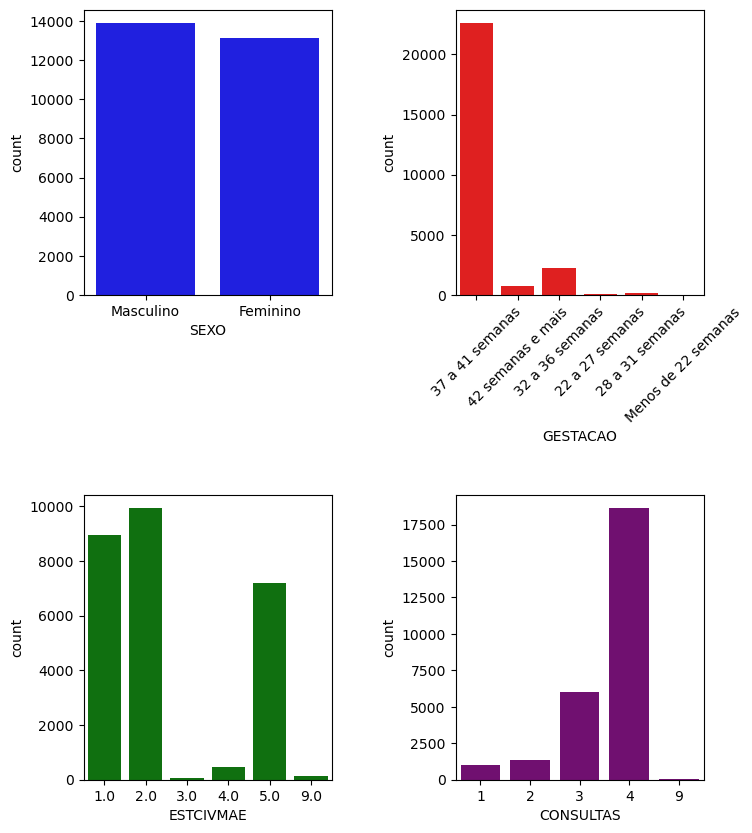

In [209]:
fig, axes = plt.subplots(2,2)
plt.rc('figure', figsize=(8,10))

# Plotando via seaborn
ax1 = sns.countplot(ax = axes[0,0], x='SEXO', data=df, color='b')
ax2 = sns.countplot(ax = axes[0,1], x='GESTACAO', data=df, color='r')
ax2.tick_params(axis='x', rotation=45)
ax3 = sns.countplot(ax = axes[1,0], x='ESTCIVMAE', data=df, color='g')
ax4 = sns.countplot(ax = axes[1,1], x='CONSULTAS', data=df, color='purple')

plt.subplots_adjust(wspace=.5, hspace=.7)